# 🌳 Decision Trees – Introduction and Regression

Decision Trees are supervised machine learning algorithms that can perform both classification and regression tasks.

They are powerful models capable of handling complex datasets.

🧠 Key Points About Decision Trees
1. No need for feature scaling
    * Decision trees work directly with the raw numerical values.
    * Scaling or normalization is not required.

2. Can work with categorical data
    * Decision trees can handle categorical features in text form.
    * (Note: Scikit-Learn’s version doesn’t support raw text categories, but TensorFlow’s does.)

3. Easy to interpret
    * Unlike many complex algorithms, the results of decision trees can be understood and visualized.
    * They are not considered “black box” models.

4. Can handle missing values
    * Missing data doesn’t affect tree performance as much as it does for other models.

5. Work well with imbalanced datasets
    * Class weights can be adjusted so that each class is properly represented.

6. Provide feature importance
    * Decision trees can show which features contribute the most to predictions.

7. Form the foundation of ensemble methods
    * Models such as Random Forests and Gradient Boosting Machines are built using multiple decision trees.

### ⚙️ How Decision Trees Work

A decision tree functions like a series of if/else questions.

For example, when choosing a car to buy, the model might evaluate features step-by-step:

*   If the safety level is high → check the number of seats.
*   If the number of seats is suitable → check the number of doors, etc.

At each step, the model splits data into smaller groups until it reaches a final decision or prediction.

### ⚠️ Downside of Decision Trees – Overfitting
A common drawback of decision trees is that they tend to overfit the training data.
In most cases, it’s almost expected that a decision tree will overfit at first.

Overfitting means the model learns the training data too well — including its noise and small details — and fails to perform well on new, unseen data.

One simple way to reduce overfitting is to limit the maximum depth of the tree using the max_depth hyperparameter.
This controls how deep the tree can grow and helps keep the model simpler.

There are also other techniques to prevent overfitting, which will be explored later.

### Contents

* [1 - Imports](#1)
* [2 - Loading the data](#2)
* [3 - Exploratory Analysis](#3)
* [4 - Preprocessing the data](#4)
* [5 - Training Decision Trees](#5)
* [6 - Evaluating Decision Trees](#6)
* [7 - Improving Decision Trees](#7)

<a name='1'></a>
## 1 - Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a name='2'></a>

## 2 - Loading the data

In this regression task with decision trees, I'll use the Machine CPU (Central Processing Unit) data which is avilable at [OpenML](https://www.openml.org/t/5492). I'll load it with Sklearn `fetch_openml` function.

In this notebook, I'll predict the relative performance of the CPU given the following data:

* MYCT: machine cycle time in nanoseconds (integer)
* MMIN: minimum main memory in kilobytes (integer)
* MMAX: maximum main memory in kilobytes (integer)
* CACH: cache memory in kilobytes (integer)
* CHMIN: minimum channels in units (integer)
* CHMAX: maximum channels in units (integer)
* PRP: published relative performance (integer) (target variable)

In [ ]:
from sklearn.datasets import fetch_openml

machine_cpu = fetch_openml(name='machine_cpu')

/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name machine_cpu exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=230
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=733

  warn(warning_msg)


In [ ]:
type(machine_cpu)

sklearn.utils._bunch.Bunch

In [ ]:
machine_cpu.data.shape

(209, 6)

In [ ]:
# displaying feature names
machine_cpu.feature_names

['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']

In [ ]:
# getting the whole dataframe
machine_cpu.frame

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,class
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...
204,124,1000,8000,0,1,8,42
205,98,1000,8000,32,2,8,46
206,125,2000,8000,0,2,14,52
207,480,512,8000,32,0,0,67


In [ ]:
# getting the data and labels
machine_data = machine_cpu.data
machine_labels = machine_cpu.target

In [ ]:
type(machine_data)

pandas.core.frame.DataFrame

In [ ]:
type(machine_labels)

pandas.core.series.Series

<a name='3'></a>
## 3 - Exploratory Analysis

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(machine_data, machine_labels, test_size=0.2, random_state=20)

print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(X_train), len(X_test)))

The size of training data is: 167 
The size of testing data is: 42


array([[<Axes: title={'center': 'MYCT'}>,
        <Axes: title={'center': 'MMIN'}>],
       [<Axes: title={'center': 'MMAX'}>,
        <Axes: title={'center': 'CACH'}>],
       [<Axes: title={'center': 'CHMIN'}>,
        <Axes: title={'center': 'CHMAX'}>]], dtype=object)

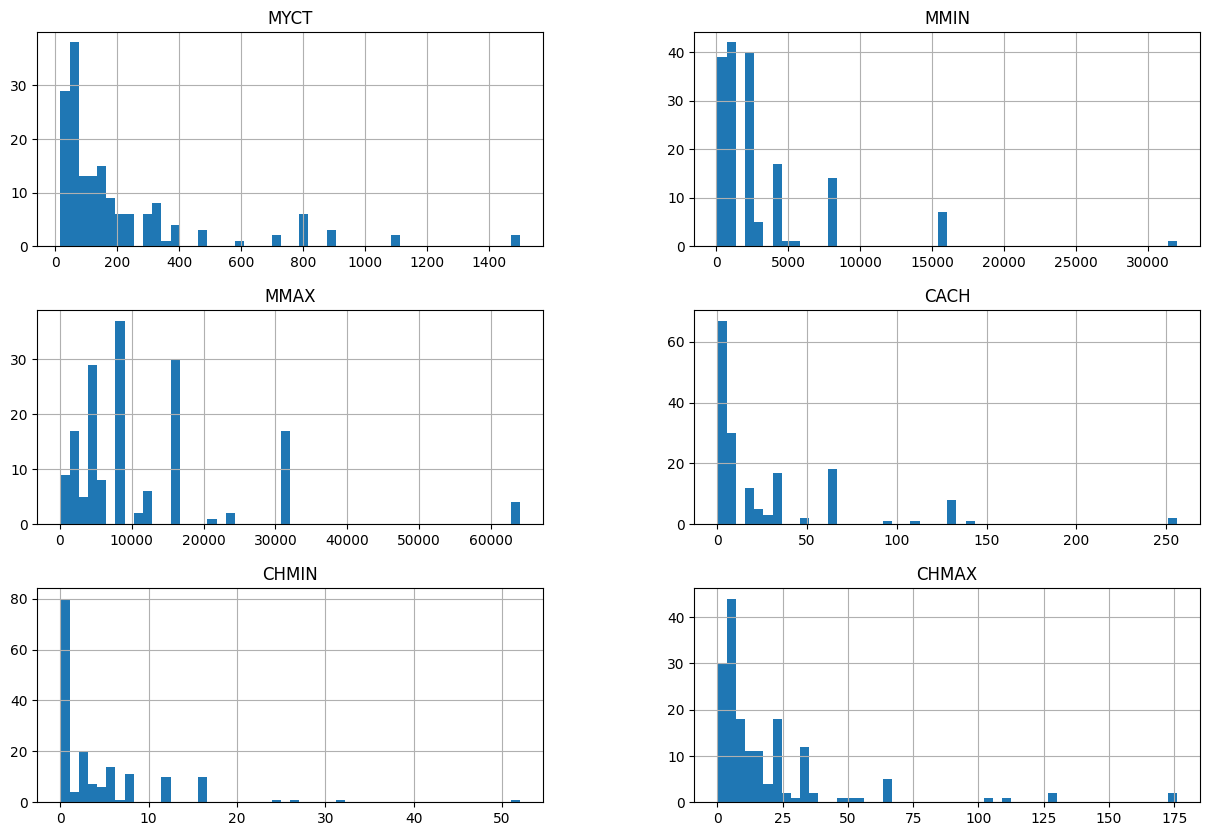

In [ ]:
# histograms of all numeric features
X_train.hist(bins=50, figsize=(15,10))

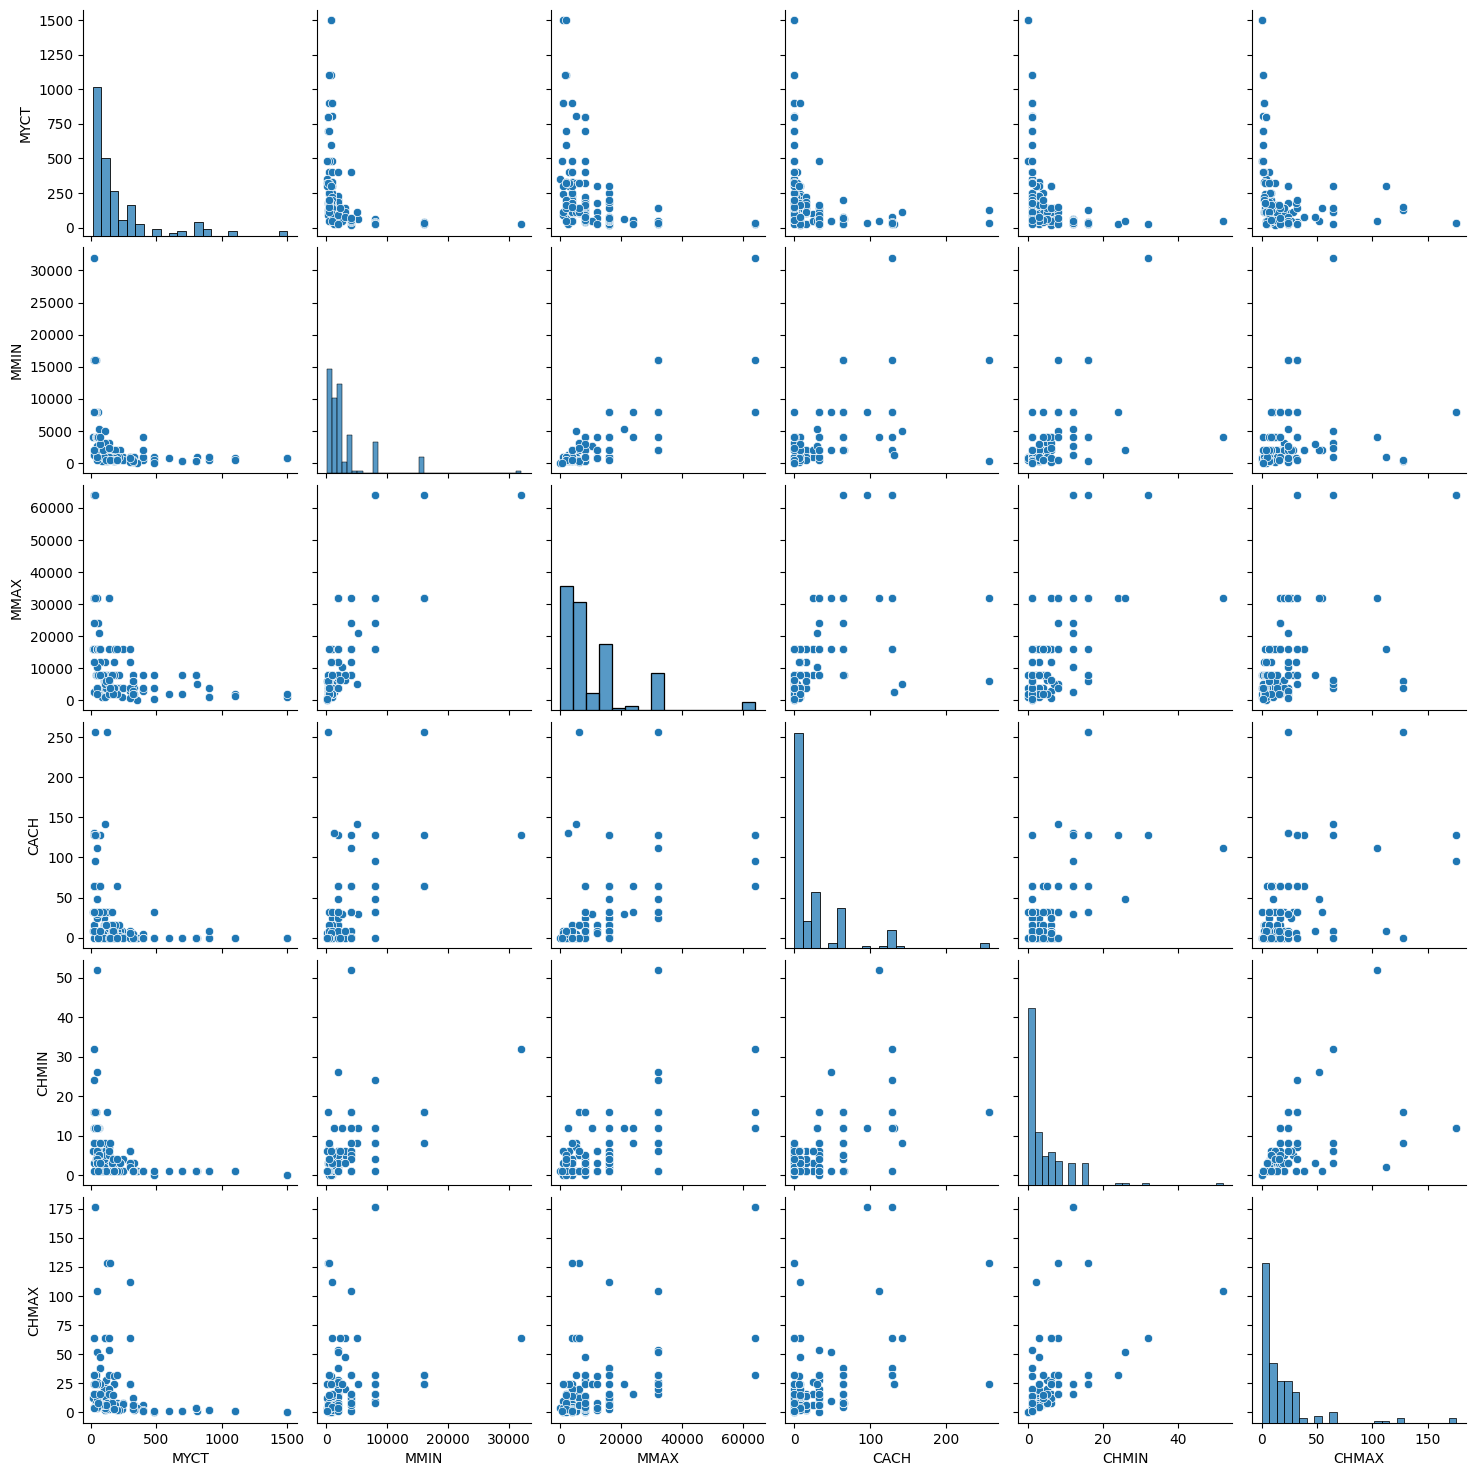

In [ ]:
sns.pairplot(X_train)

In [ ]:
# checking summary stats
X_train.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,207.958084,2900.826347,11761.161677,26.071856,4.760479,18.616766
std,266.772823,4165.950964,12108.332354,42.410014,6.487439,27.489919
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000
75%,232.500000,3100.000000,16000.000000,32.000000,6.000000,24.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000


In [ ]:
# checking missing values

X_train.isnull().sum()

,0
MYCT,0
MMIN,0
MMAX,0
CACH,0
CHMIN,0
CHMAX,0


<a name='4'></a>
## 4 - Data Preprocessing
* Preparing data before training the model.
* Decision trees don’t need feature scaling.
* I'm gonna create a pipeline with scaling to test this idea.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scale_pipe = Pipeline([
    ('scaler', StandardScaler())
])

X_train_scaled = scale_pipe.fit_transform(X_train)

<a name='5'></a>

## 5 - Training Decision Tree Regressor


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# training non-scaled data
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# training scaled data
tree_reg_scaled = DecisionTreeRegressor()
tree_reg_scaled.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

<a name='6'></a>
#6 - Evaluating Decision Trees
* First, checking the Root Mean Squared Error (RMSE) on the training data.

* It’s not recommended to use the test data yet since the model hasn’t been improved.

* A function will be created to calculate the error easily and avoid repeating the same code.

In [ ]:
from sklearn.metrics import mean_squared_error

# Simple function to get RMSE for any model
def get_rmse(X, model, y):
    preds = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, preds))
    return rmse

In [ ]:
# non-scaled data/model
get_rmse(X_train, tree_reg, y_train)

np.float64(9.724590719956222)

In [ ]:
# scaled data/model
get_rmse(X_train_scaled, tree_reg_scaled, y_train)

np.float64(9.724590719956222)

There is no difference at all. In decision trees, whether I scale the data or not, my predictions will not be affected.

<a name='7'></a>

## 7 - Improving Decision Trees

### Cell 1 — Checking model parameters

In [ ]:
# Checking the current parameters of the Decision Tree model to see how it is set up before tuning.
tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

### Cell 2 — Preparing for tuning

In [ ]:
# I want to improve the Decision Tree by finding the best hyperparameters.
# Since the dataset is small, it might overfit.

### Cell 3 — Defining hyperparameter grid

In [ ]:
# Creating a grid of possible hyperparameters to test with GridSearch.
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

params_grid = {
    'max_leaf_nodes': list(range(1, 10)),  # different number of leaf nodes
    'min_samples_split': [2, 3, 4, 5],     # different minimum samples to split
    'max_depth': [None, 2, 3, 4]           # different maximum depths
}

### Cell 4 — Running Grid Search

In [ ]:
# Using GridSearchCV to find the best combination of hyperparameters.
grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    params_grid,
    verbose=1,
    cv=3,
    refit=True
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
48 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 2, 3, 4],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=1)

### Cell 5 — Viewing best parameters and model

In [ ]:
# Looking at the best hyperparameters found by Grid Search.
grid_search.best_params_

{'max_depth': None, 'max_leaf_nodes': 9, 'min_samples_split': 5}

In [ ]:
# Checking the best model after tuning.
grid_search.best_estimator_

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=5, random_state=42)

### Cell 6 — Saving the best model

In [ ]:
# Saving the best estimator from Grid Search to use for predictions.
tree_best = grid_search.best_estimator_

### Cell 7 — Evaluating on training data

In [ ]:
# Checking the RMSE on training data with the best model.
get_rmse(X_train, tree_best, y_train)

np.float64(44.118028410047934)

### Cell 8 — Evaluating on test data

In [ ]:
# Checking the RMSE on test data using the original model to compare.
get_rmse(X_test, tree_reg, y_test)

np.float64(40.765590064824686)

### Cell 9 — Final conclusion

In [ ]:
# I see that the model overfitted.
# The improvements from tuning didn’t help much due to the small dataset.
# This was a useful exercise to understand decision trees and hyperparameter tuning.